In [75]:
import sys
import warnings
warnings.simplefilter("ignore")

# LIBRERIAS

In [52]:
## Librerías a usar
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import random
import math
from scipy.stats import norm

# DATOS

In [53]:
## Cargar la red
base=pd.read_excel("./Base-inicial.xlsx")
base

,Organization Name,Headquarters Location,Operating Status,Company Type,Number of Investments,Number of Lead Investments,Number of Diversity Investments,Number of Exits,Number of Lead Investors,Number of Investors,...,Total Funding Amount Currency,Total Funding Amount Currency (in USD),Number of Events,SEMrush - Monthly Visits,SEMrush - Average Visits (6 months),SEMrush - Visit Duration,Aberdeen - IT Spend,Aberdeen - IT Spend Currency,Aberdeen - IT Spend Currency (in USD),Principales inversionistas
0,Tencent,"Shenzhen, Guangdong, China",Active,For Profit,693.0,375.0,15.0,125.0,1.0,4.0,...,USD,1.257677e+10,22.0,"4,085,844","3,553,184",600.0,NaN,NaN,NaN,"IDG Capital, Prosus & Naspers, Lippo Group, PCCW"
1,Warburg Pincus,"New York, New York, United States",Active,NaN,433.0,286.0,22.0,131.0,NaN,NaN,...,USD,3.802820e+07,NaN,34.635,"34,033.67",392.0,53801.0,USD,53801.0,NaN
2,Twitter,"San Francisco, California, United States",Active,For Profit,10.0,2.0,1.0,3.0,9.0,37.0,...,USD,4.430192e+09,77.0,"6,026,399,205","3,104,998,131.33",942.0,NaN,NaN,NaN,"Andreessen Horowitz, Morgan Stanley, Spark Cap..."
3,Ubisoft,"Montreuil-sous-bois, Ile-de-France, France",Active,For Profit,9.0,NaN,NaN,1.0,1.0,4.0,...,USD,7.706506e+08,16.0,"32,820,567","27,881,933.83",392.0,NaN,NaN,NaN,"Tencent, JP Morgan Chase, Ontario Teachers' Pe..."
4,WeWork,"New York, New York, United States",Active,For Profit,9.0,6.0,4.0,2.0,11.0,24.0,...,USD,2.159578e+10,120.0,"2,646,155","2,483,475.83",280.0,343977.0,USD,343977.0,"SoftBank, JP Morgan Chase, Goldman Sachs, Insi..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2206,Activation Capital,NaN,Active,NaN,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2207,Gavi,"Moritzburg, Sachsen, Germany",Active,For Profit,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4070569.0,USD,4070569.0,NaN
2208,BF Holdings,"Dudley, Dudley, United Kingdom",Closed,For Profit,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2209,GO Virginia,NaN,Active,NaN,2.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.495,NaN,0.0,NaN,NaN,NaN,NaN


In [54]:
base.dtypes

Organization Name                                       object
Headquarters Location                                   object
Operating Status                                        object
Company Type                                            object
Number of Investments                                  float64
Number of Lead Investments                             float64
Number of Diversity Investments                        float64
Number of Exits                                        float64
Number of Lead Investors                               float64
Number of Investors                                    float64
Industry Groups                                         object
Industries                                              object
Number of Funding Rounds                               float64
Funding Status                                          object
Last Funding Date                               datetime64[ns]
Last Funding Amount                                    

# CREACIÓN DE NODOS Y ARCOS

In [55]:
# Crear los nodos
nodos = base.dropna(subset=['Organization Name', 'Principales inversionistas'])
nodos

,Organization Name,Headquarters Location,Operating Status,Company Type,Number of Investments,Number of Lead Investments,Number of Diversity Investments,Number of Exits,Number of Lead Investors,Number of Investors,...,Total Funding Amount Currency,Total Funding Amount Currency (in USD),Number of Events,SEMrush - Monthly Visits,SEMrush - Average Visits (6 months),SEMrush - Visit Duration,Aberdeen - IT Spend,Aberdeen - IT Spend Currency,Aberdeen - IT Spend Currency (in USD),Principales inversionistas
0,Tencent,"Shenzhen, Guangdong, China",Active,For Profit,693.0,375.0,15.0,125.0,1.0,4.0,...,USD,1.257677e+10,22.0,"4,085,844","3,553,184",600.00,NaN,NaN,NaN,"IDG Capital, Prosus & Naspers, Lippo Group, PCCW"
2,Twitter,"San Francisco, California, United States",Active,For Profit,10.0,2.0,1.0,3.0,9.0,37.0,...,USD,4.430192e+09,77.0,"6,026,399,205","3,104,998,131.33",942.00,NaN,NaN,NaN,"Andreessen Horowitz, Morgan Stanley, Spark Cap..."
3,Ubisoft,"Montreuil-sous-bois, Ile-de-France, France",Active,For Profit,9.0,NaN,NaN,1.0,1.0,4.0,...,USD,7.706506e+08,16.0,"32,820,567","27,881,933.83",392.00,NaN,NaN,NaN,"Tencent, JP Morgan Chase, Ontario Teachers' Pe..."
4,WeWork,"New York, New York, United States",Active,For Profit,9.0,6.0,4.0,2.0,11.0,24.0,...,USD,2.159578e+10,120.0,"2,646,155","2,483,475.83",280.00,343977.0,USD,343977.0,"SoftBank, JP Morgan Chase, Goldman Sachs, Insi..."
5,Wagestream,"London, England, United Kingdom",Active,For Profit,1.0,NaN,NaN,NaN,6.0,15.0,...,USD,2.543234e+08,NaN,33.731,"19,865.67",122.00,NaN,NaN,NaN,"Smash Capital, Ascension, BlackRock, QED Inves..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108,Baidu,"Beijing, Beijing, China",Active,For Profit,113.0,62.0,3.0,27.0,5.0,10.0,...,USD,2.620000e+07,37.0,"165,824,170","135,372,669.33",976.00,NaN,NaN,NaN,"Google, IDG Capital, Threshold, ePlanet Capita..."
2114,Backstage Capital,"West Hollywood, California, United States",Active,NaN,143.0,24.0,114.0,3.0,NaN,1.0,...,NaN,NaN,1.0,13.025,18.055,546.00,NaN,NaN,NaN,Josef Scarantino
2143,Boost VC,"San Mateo, California, United States",Active,NaN,266.0,25.0,38.0,29.0,NaN,1.0,...,NaN,NaN,3.0,734,"2,610.83",53.00,NaN,NaN,NaN,Mason Ng
2147,ESL Gaming,"Cologne, Nordrhein-Westfalen, Germany",Active,For Profit,1.0,1.0,NaN,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Omnes Capital


In [56]:
nodos[nodos['Organization Name']=='Mason Ng']

,Organization Name,Headquarters Location,Operating Status,Company Type,Number of Investments,Number of Lead Investments,Number of Diversity Investments,Number of Exits,Number of Lead Investors,Number of Investors,...,Total Funding Amount Currency,Total Funding Amount Currency (in USD),Number of Events,SEMrush - Monthly Visits,SEMrush - Average Visits (6 months),SEMrush - Visit Duration,Aberdeen - IT Spend,Aberdeen - IT Spend Currency,Aberdeen - IT Spend Currency (in USD),Principales inversionistas


In [57]:
# Crear los arcos para estos nuevos individuos
sources = [] # lista de origenes
target = [] # lista de destinos

for i in nodos.index:
    texto = nodos["Principales inversionistas"][i]
    conexiones = texto.split(',')
    for j in range(len(conexiones)):
        # Agregar el origen
        target.append(nodos["Organization Name"][i])
        # Agregar el destino
        sources.append(conexiones[j])

In [58]:
# Crear el archivo de arcos

tuplas=list(zip(sources, target))

# Crear un Data Frame a partir de las tuplas
arcos = pd.DataFrame( tuplas, columns =['Source', 'Target'])
arcos

,Source,Target
0,IDG Capital,Tencent
1,Prosus & Naspers,Tencent
2,Lippo Group,Tencent
3,PCCW,Tencent
4,Andreessen Horowitz,Twitter
...,...,...
5071,TA Associates,Bigpoint
5072,Summit Partners,Bigpoint
5073,GMT Capital,Bigpoint
5074,Peacock Equity,Bigpoint


In [59]:
nodos2 = nodos[nodos['Organization Name'].isin(arcos.Source)].drop('Principales inversionistas',axis=1)
nodos2

,Organization Name,Headquarters Location,Operating Status,Company Type,Number of Investments,Number of Lead Investments,Number of Diversity Investments,Number of Exits,Number of Lead Investors,Number of Investors,...,Total Funding Amount,Total Funding Amount Currency,Total Funding Amount Currency (in USD),Number of Events,SEMrush - Monthly Visits,SEMrush - Average Visits (6 months),SEMrush - Visit Duration,Aberdeen - IT Spend,Aberdeen - IT Spend Currency,Aberdeen - IT Spend Currency (in USD)
0,Tencent,"Shenzhen, Guangdong, China",Active,For Profit,693.000,375.0,15.0,125.0,1.0,4.0,...,1.257677e+10,USD,1.257677e+10,22.0,"4,085,844","3,553,184",600.0,NaN,NaN,NaN
3,Ubisoft,"Montreuil-sous-bois, Ile-de-France, France",Active,For Profit,9.000,NaN,NaN,1.0,1.0,4.0,...,7.706506e+08,USD,7.706506e+08,16.0,"32,820,567","27,881,933.83",392.0,NaN,NaN,NaN
7,Techstars,"Boulder, Colorado, United States",Active,For Profit,3.569,491.0,795.0,363.0,1.0,11.0,...,1.088000e+08,USD,1.088000e+08,318.0,606.778,"240,410.17",275.0,26964318.0,USD,26964318.0
12,Zomato,"Gurgaon, Haryana, India",Active,For Profit,15.000,13.0,NaN,2.0,12.0,25.0,...,2.100568e+09,USD,2.100568e+09,NaN,"28,528,270","22,805,302",494.0,NaN,NaN,NaN
15,SAP,"Walldorf, Baden-Wurttemberg, Germany",Active,For Profit,29.000,7.0,NaN,14.0,1.0,2.0,...,1.301371e+09,USD,1.301371e+09,239.0,"27,548,849","26,208,156.17",544.0,67473085.0,USD,67473085.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1960,Earlybird Venture Capital,"Berlin, Berlin, Germany",Active,For Profit,281.000,112.0,3.0,44.0,1.0,1.0,...,1.800000e+07,EUR,2.098876e+07,11.0,7.637,"12,045.33",153.0,13241876.0,USD,13241876.0
1966,EquityZen,"New York, New York, United States",Active,For Profit,37.000,2.0,4.0,31.0,1.0,16.0,...,1.130937e+07,USD,1.130937e+07,2.0,373.848,"506,332.33",713.0,246443.0,USD,246443.0
2015,Golub Capital,"San Francisco, California, United States",Active,NaN,31.000,12.0,3.0,14.0,NaN,1.0,...,NaN,NaN,NaN,NaN,15.95,"10,751.5",510.0,NaN,NaN,NaN
2075,ArcTern Ventures,"Toronto, Ontario, Canada",Active,NaN,41.000,13.0,3.0,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,3.28,NaN,10.0,NaN,NaN,NaN


In [60]:
arcos2 = arcos[arcos.Source.isin(nodos2['Organization Name'])]
arcos2

,Source,Target
9,Tencent,Ubisoft
13,SoftBank,WeWork
41,Galaxy Digital,Terra
46,Digital Currency Group,Wyre
51,Apple,Zomato
...,...,...
5030,Tencent,DST Global
5043,500 Startups,Golden Gate
5050,Google,AOL
5061,BC Partners,Altice USA


In [61]:
nodos2 = nodos2.set_index('Organization Name')

In [62]:
# Construir red
G=nx.DiGraph()
# Nodos
# Agregar los nodos por su identificador
G.add_nodes_from(nodos2.index)
# Agregar los atributos de los nodos
# Primero recorrer los nodos que se agregaron a la red
for nodo in G.nodes:
    # En cada nodo recorremos los atributos de los nodos
    for atr in nodos2:
        # Agregar cada atributo al nodo
        G.nodes[nodo][atr]=nodos2[atr][nodo]
# Arcos
# Agregar los arcos
G.add_edges_from([tuple(x) for x in arcos2[['Source','Target']].to_numpy()])

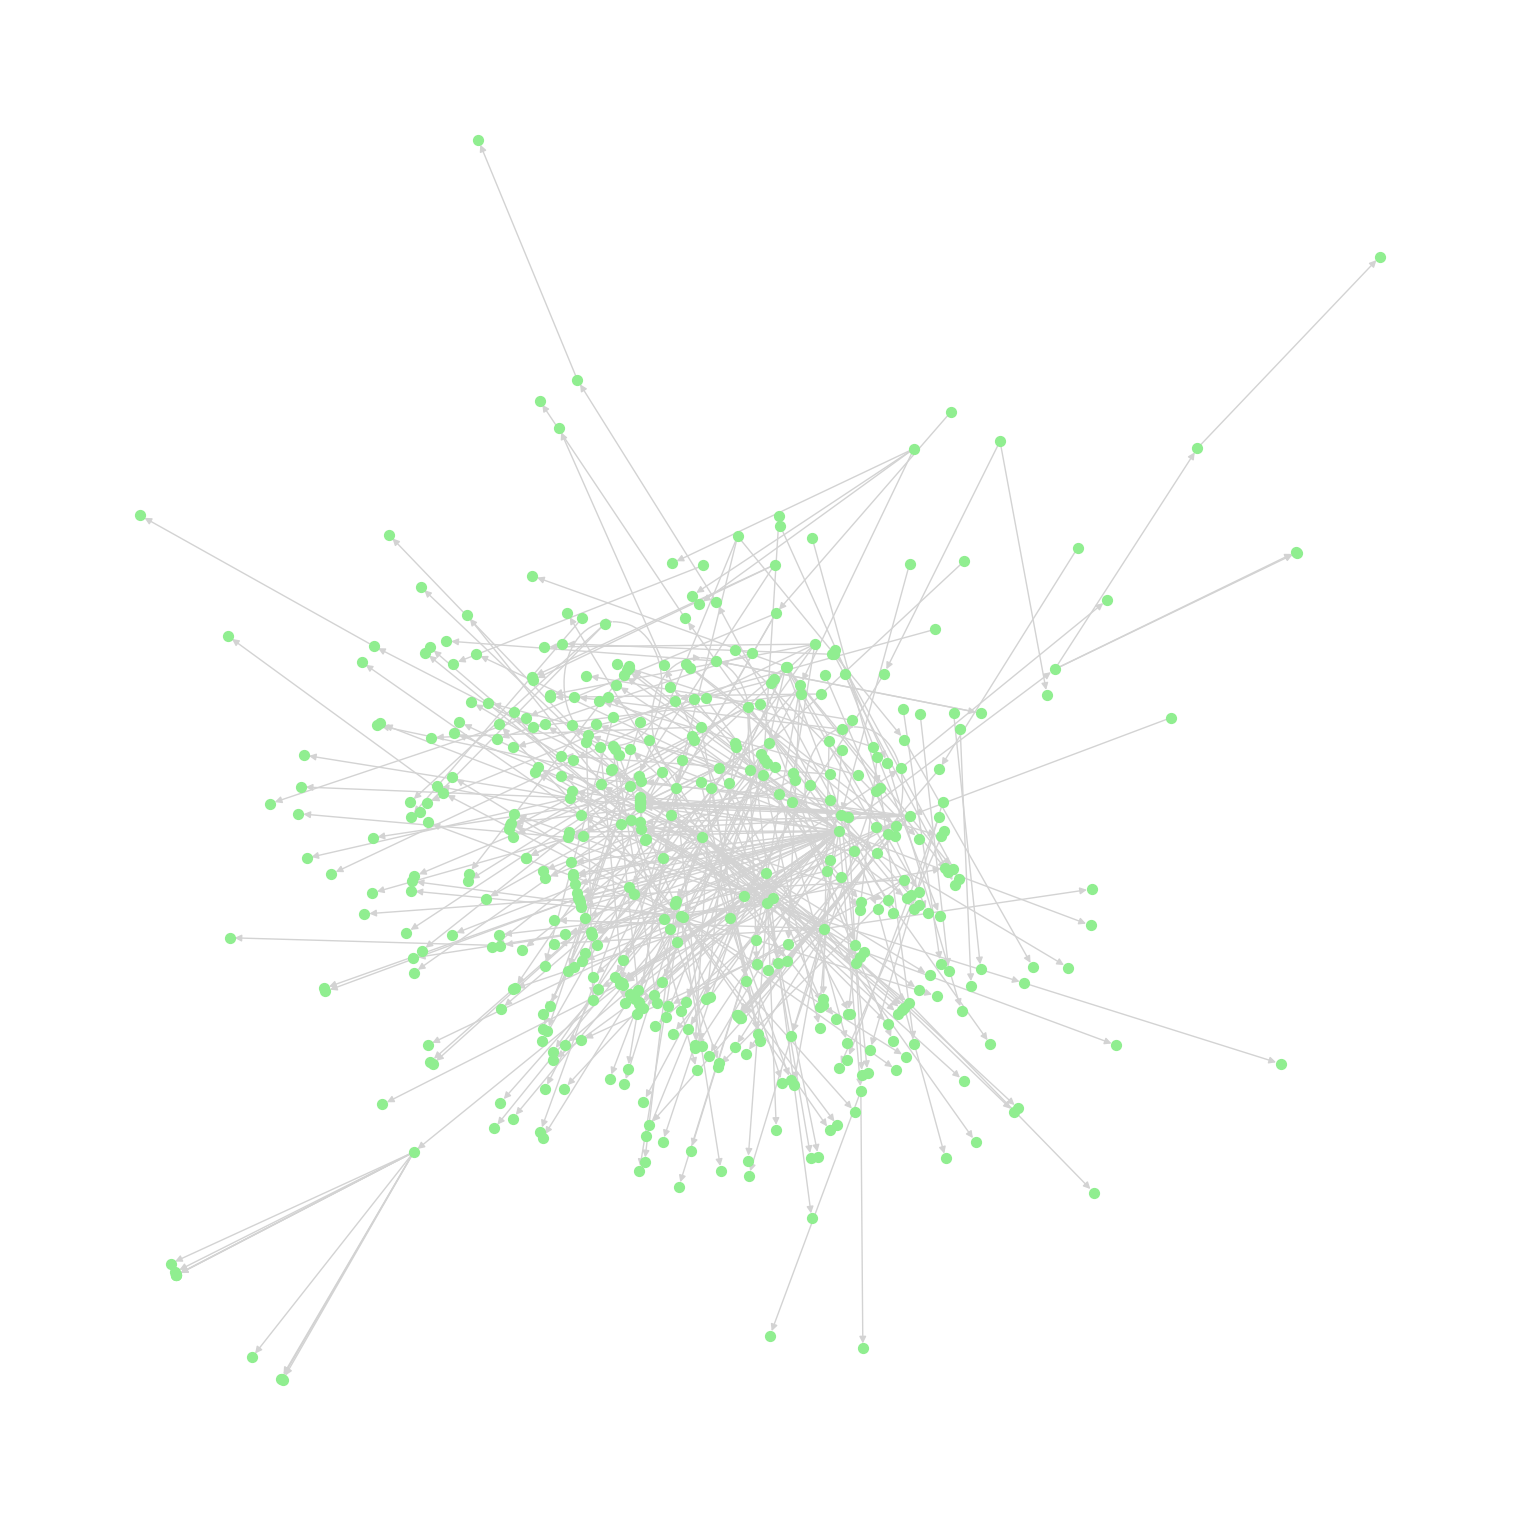

In [63]:
# Lienzo de la gráfica
fig=plt.figure(figsize=(15,15))
# Después se genera el gráfico
nx.draw_kamada_kawai(G, node_size=50, node_color='lightgreen', edge_color='lightgray')
# Por último se muestra la gráfica
plt.show()

In [64]:
nodos2.to_csv('nodos.csv')

In [65]:
arcos2.to_csv('arcos.csv')

# Medidas de centralidad y prestigio

### Medidas de los nodos

#### Grado de un nodo

``degree()``: Número de arcos que salen de un nodo determinado

In [66]:
grados_degree=G.degree()

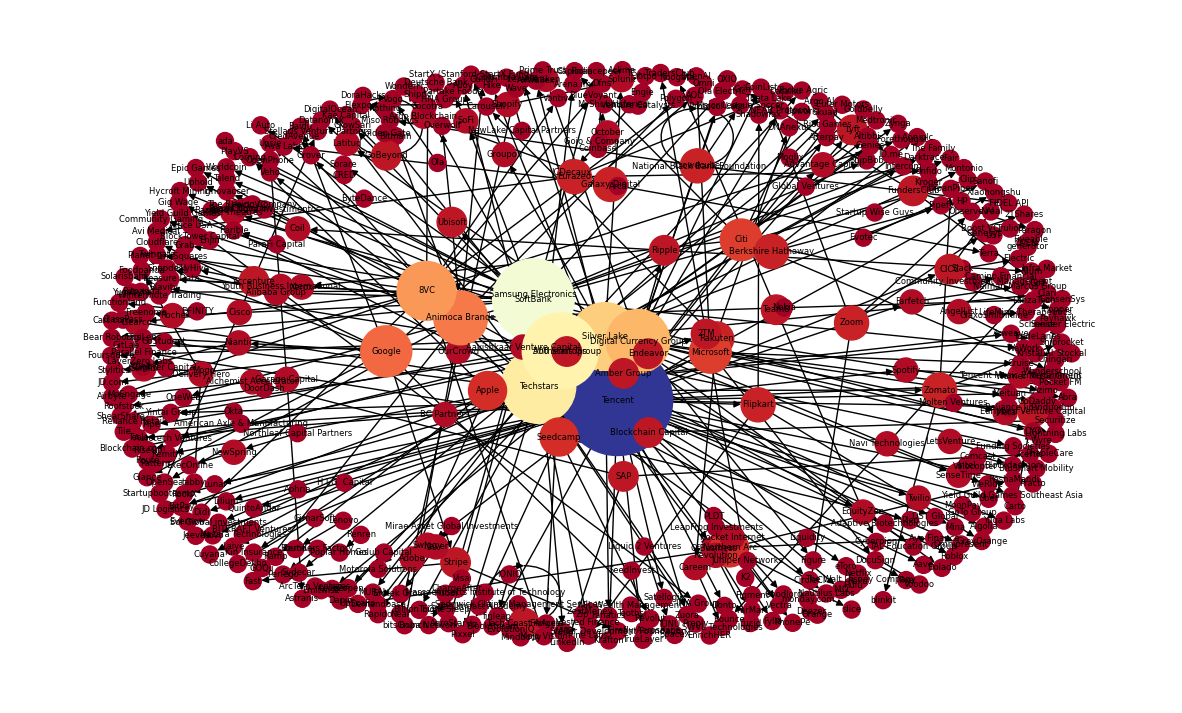

In [86]:
# Definir tamaño gráfica
fig, ax = plt.subplots(figsize=(15, 9)) 

# Convertir el DiDegreeView a un diccionario
grados_degree = dict(grados_degree)

# Posición de los nodos
pos = nx.spring_layout(G)

#tamaño de los nodos
nodes_size  = [150 * val_node for val_node in grados_degree.values()]


# Visualizar la red
nx.draw(G, with_labels=True, font_size=6, node_color=list(grados_degree.values()), cmap=plt.cm.RdYlBu, node_size=nodes_size, ax=ax, pos=pos)
'''
# Crear una lista con los nombres de las categorías
categorias = list(set(grados_degree.values()))

# Crear un diccionario con los colores para cada categoría
colores = {categoria: plt.cm.RdYlBu(categoria/max(categorias)) for categoria in categorias}

# Agregar la leyenda a la gráfica  
plt.legend(handles=[nx.draw_networkx_nodes(G, nodelist=[n], node_color=colores[grados_degree[n]], pos=pos) for n in G.nodes()],
           labels=[f"Grado {categoria}" for categoria in categorias],
           title="Grado de los nodos",
           loc="best",
           bbox_to_anchor=(1, 1))
'''

# Mostrar la gráfica
plt.show()


``in_degree()``: Número de arcos que llegan a un nodo determinado

In [88]:
grados_in_degree=G.in_degree()

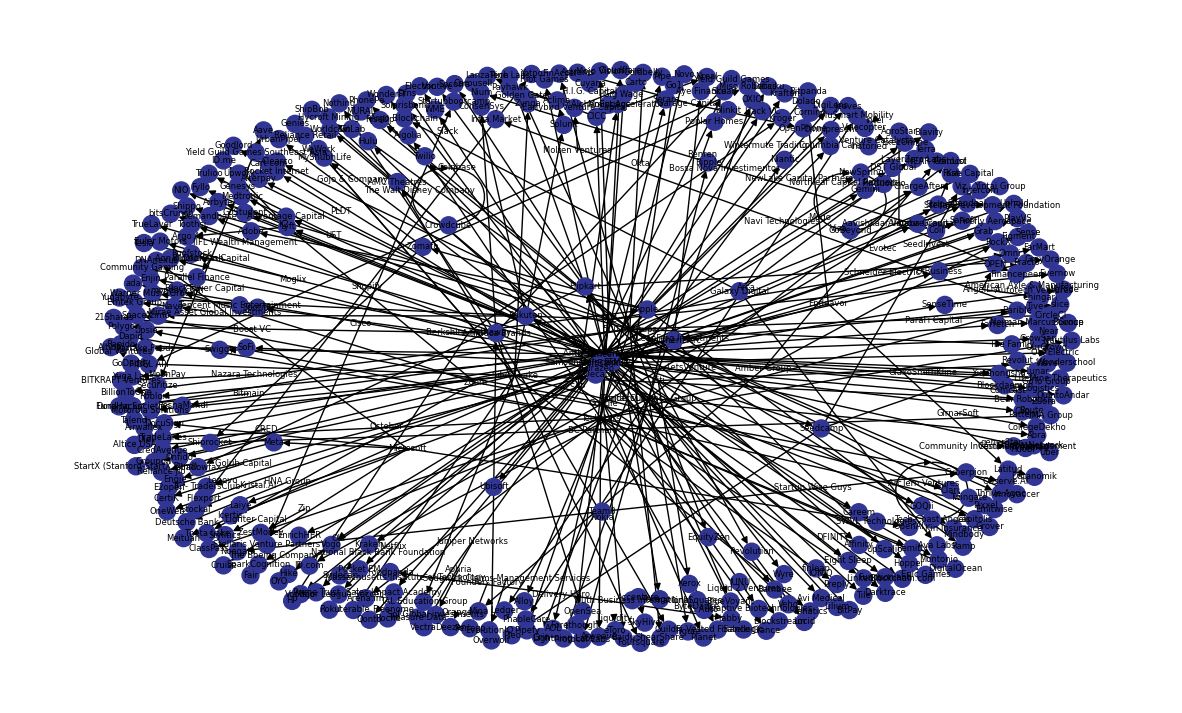

In [92]:
# Definir tamaño gráfica
fig, ax = plt.subplots(figsize=(15, 9)) 

# Convertir el DiDegreeView a un diccionario
grados_in_degree = dict(grados_in_degree)

# Posición de los nodos
pos = nx.spring_layout(G)

#tamaño de los nodos
nodes_size  = [150 * val_node for val_node in grados_in_degree.values()]


# Visualizar la red
nx.draw(G, with_labels=True, font_size=6, node_color=list(grados_in_degree.values()), cmap=plt.cm.RdYlBu, node_size=nodes_size, ax=ax, pos=pos)

# Mostrar la gráfica
plt.show()

``out_degree()``: Número total de arcos de un nodo

In [93]:
grados_out_degree=G.out_degree()

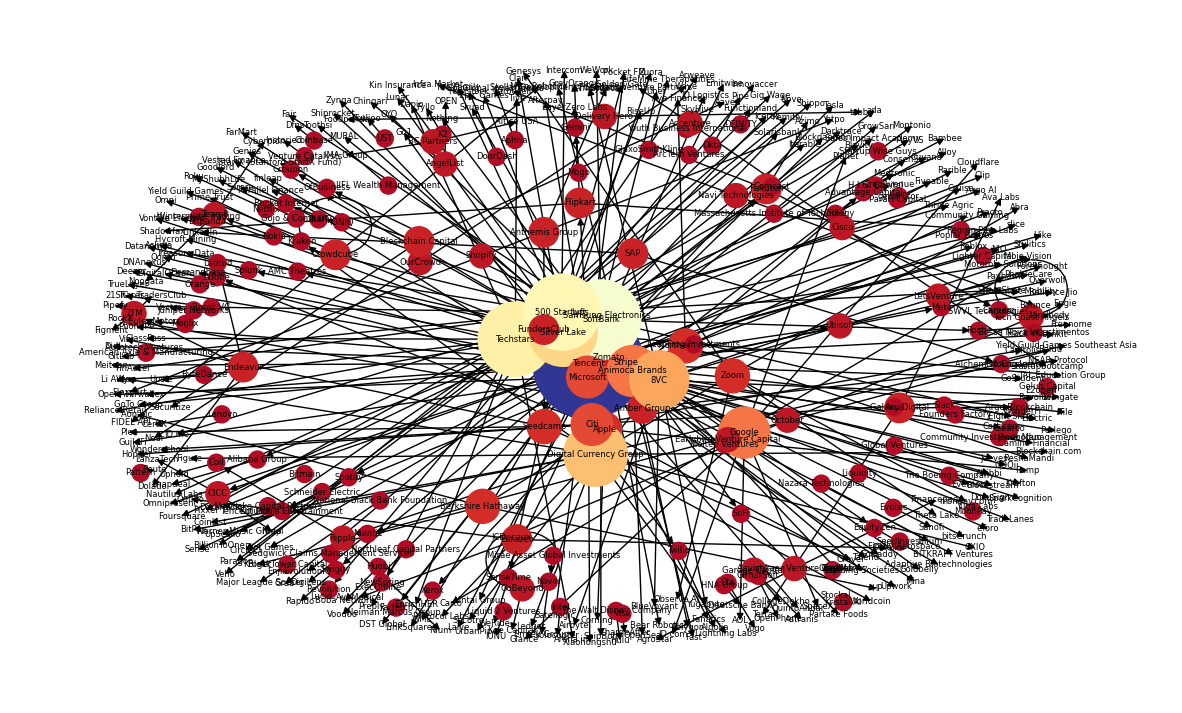

In [95]:
# Definir tamaño gráfica
fig, ax = plt.subplots(figsize=(15, 9)) 

# Convertir el DiDegreeView a un diccionario
grados_out_degree = dict(grados_out_degree)

# Posición de los nodos
pos = nx.spring_layout(G)

#tamaño de los nodos
nodes_size  = [150 * val_node for val_node in grados_out_degree.values()]


# Visualizar la red
nx.draw(G, with_labels=True, font_size=6, node_color=list(grados_out_degree.values()), cmap=plt.cm.RdYlBu, node_size=nodes_size, ax=ax, pos=pos)

# Mostrar la gráfica
plt.show()

#### Nodo más conectado

In [96]:
#Forma 1

# Convertir el DiDegreeView a un diccionario
grados_degree = dict(grados_degree)
# Encontrar 
grafo_mayor_conexiones = max(grados_degree.items(), key=lambda x: x[1])[0]
grafo_mayor_conexiones

'Tencent'

#### Centralidad Eigenvector

Nodo con mayor Centralidad Eigenvector

In [97]:
# Convertir el DiDegreeView a un diccionario
eigenvector_central = dict( nx.eigenvector_centrality(G))
eigenvector_centrals = max(eigenvector_central.items(), key=lambda x: x[1])[0]
eigenvector_centrals

'Tech Coast Angels'

#### Centralidad de intermediación Betweenness

Nodo con mayor centralidad de intermediación (betweenness)

In [98]:
betweenness_central = dict(nx.betweenness_centrality(G))
betweenness_centrals = max(betweenness_central.items(), key=lambda x: x[1])[0]
betweenness_centrals

'SoftBank'